In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from pathlib import Path

In [3]:
version = 'v7'
data_path = Path('data/midi')
version_path = data_path/version
orig_path = version_path/'midi_sources'

In [4]:
import music21
from ht_encode import *
import ht_encode
from fastai.data_block import get_files

### Make sure to edit config

In [5]:
ht_encode.config.continuous=True

In [6]:
h_path = orig_path/'hooktheory'

In [7]:
files = get_files(h_path, extensions=['.xml'], recurse=True); files[:10]

[PosixPath('data/midi/v7/midi_sources/hooktheory/xml/w/wayne-sharpe/yu-gi-oh-theme-song/chorus.xml'),
 PosixPath('data/midi/v7/midi_sources/hooktheory/xml/w/wayne-sharpe/yu-gi-oh-theme-song/intro.xml'),
 PosixPath('data/midi/v7/midi_sources/hooktheory/xml/w/what-a-day/kiefer/chorus.xml'),
 PosixPath('data/midi/v7/midi_sources/hooktheory/xml/w/whiteflame/senbonzakura/pre-chorus.xml'),
 PosixPath('data/midi/v7/midi_sources/hooktheory/xml/w/whiteflame/senbonzakura/verse.xml'),
 PosixPath('data/midi/v7/midi_sources/hooktheory/xml/w/whiteflame/senbonzakura/chorus.xml'),
 PosixPath('data/midi/v7/midi_sources/hooktheory/xml/w/wham/last-christmas/verse.xml'),
 PosixPath('data/midi/v7/midi_sources/hooktheory/xml/w/wham/last-christmas/chorus.xml'),
 PosixPath('data/midi/v7/midi_sources/hooktheory/xml/w/wham/last-christmas/intro.xml'),
 PosixPath('data/midi/v7/midi_sources/hooktheory/xml/w/wham/freedom/chorus.xml')]

In [8]:
np.set_printoptions(edgeitems=10, threshold=40, linewidth=200)

## Testing xml to hsong

In [9]:
# Loading from specific file
# keywords = ['get-lucky', 'daft-punk', 'pre-chorus']
# keywords = ['skrillex', 'scary']
# keywords = ['idina', 'verse', 'let']
keywords = ['idina', 'intro', 'let']
# keywords = ['game-of-thrones', 'intro', 'ramin']
# keywords = ['kiss-from-a-rose', 'seal']
def contains_keywords(f): return all([k in str(f) for k in keywords])
search = [f for f in files if contains_keywords(f)]; search

[PosixPath('data/midi/v7/midi_sources/hooktheory/xml/i/idina-menzel/let-it-go/intro.xml'),
 PosixPath('data/midi/v7/midi_sources/hooktheory/xml/i/idina-menzel/let-it-go/intro-and-verse.xml')]

In [10]:
file_path = search[0]

In [11]:
content = load_data(file_path)
root = xml_parser(content)
metadata, version = get_metadata(root)
segments, num_measures = get_lead_sheet(root, version)

In [12]:
song = HSong.parse(metadata, segments); song

Part[0]:
[Chords]:
B(abs=0.0:dur=4.0) C([[sd=6:oct=3, sd=1:oct=4, sd=3:oct=4]])
B(abs=4.0:dur=4.0) C([[sd=4:oct=3, sd=6:oct=3, sd=1:oct=4, sd=3:oct=4]])
B(abs=8.0:dur=4.0) C([[sd=5:oct=3, sd=6:oct=3, sd=2:oct=4]])
B(abs=12.0:dur=2.0) C([[sd=2:oct=3, sd=5:oct=3, sd=6:oct=3]])
B(abs=14.0:dur=2.0) C([[sd=2:oct=3, sd=4:oct=3, sd=6:oct=3]])
B(abs=16.0:dur=4.0) C([[sd=6:oct=3, sd=1:oct=4, sd=3:oct=4]])
B(abs=20.0:dur=4.0) C([[sd=4:oct=3, sd=6:oct=3, sd=1:oct=4, sd=3:oct=4]])
B(abs=24.0:dur=4.0) C([[sd=5:oct=3, sd=6:oct=3, sd=2:oct=4]])
B(abs=28.0:dur=2.0) C([[sd=2:oct=3, sd=5:oct=3, sd=6:oct=3]])
B(abs=30.0:dur=2.0) C([[sd=2:oct=3, sd=4#:oct=3, sd=6:oct=3]])

[Notes]:
B(abs=0.0:dur=0.5) P(sd=7:oct=6)
B(abs=0.5:dur=0.5) P(sd=1:oct=7)
B(abs=1.0:dur=0.5) P(sd=3:oct=6)
B(abs=1.5:dur=1.0) P(sd=7:oct=6)
B(abs=2.5:dur=0.5) P(sd=1:oct=7)
B(abs=4.0:dur=0.5) P(sd=7:oct=6)
B(abs=4.5:dur=0.5) P(sd=1:oct=7)
B(abs=5.0:dur=0.5) P(sd=3:oct=6)
B(abs=5.5:dur=1.0) P(sd=1:oct=7)
B(abs=6.5:dur=1.0) P(sd=7:oct=6)

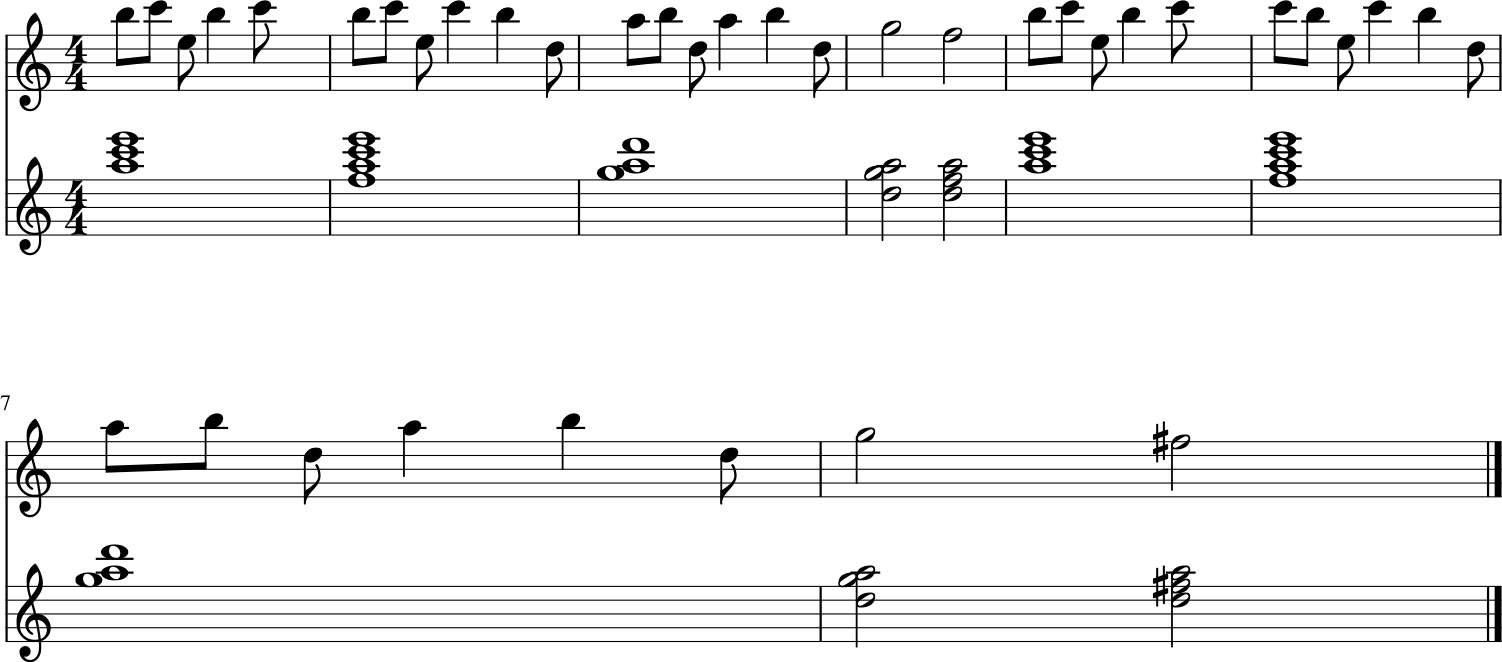

In [13]:
stream = song.to_stream()
# stream.show('midi')
stream.show()

### NOTE: need to figure out if measure should be relative to individual parts or the whole song

In [14]:
encs = enc_song(song)

In [15]:
encs

array([[ 2,  0,  0,  2,  0,  0,  0,  0,  0,  0],
       [14,  9,  3, 12,  3,  7,  0,  3,  3,  3],
       [14,  9,  4, 12,  3,  7,  0,  4,  3,  3],
       [ 3, 10,  3, 12,  3,  7,  0,  4,  3,  3],
       [ 3, 10,  4, 12,  3,  7,  0,  4,  3,  3],
       [ 7,  9,  3, 12,  3,  7,  0,  4,  4,  3],
       [ 7,  9,  4, 12,  3,  7,  0,  4,  4,  3],
       [14,  9,  3, 12,  3,  7,  0,  4,  4,  3],
       [14,  9,  4, 12,  3,  7,  0,  4,  4,  3],
       [14,  9,  4, 12,  3,  7,  0,  4,  5,  3],
       ...,
       [10,  9,  4,  5, 10, 12,  0,  4,  4, 10],
       [10,  9,  4,  5, 10, 12,  0,  4,  4, 10],
       [ 9,  9,  3,  5,  9, 12,  0,  3,  5, 10],
       [ 9,  9,  4,  5,  9, 12,  0,  4,  5, 10],
       [ 9,  9,  4,  5,  9, 12,  0,  4,  5, 10],
       [ 9,  9,  4,  5,  9, 12,  0,  4,  5, 10],
       [ 9,  9,  4,  5,  9, 12,  0,  4,  6, 10],
       [ 9,  9,  4,  5,  9, 12,  0,  4,  6, 10],
       [ 9,  9,  4,  5,  9, 12,  0,  4,  6, 10],
       [ 9,  9,  4,  5,  9, 12,  0,  4,  6, 10]])

In [16]:
dec_song = dec_arr(encs); dec_song

Part[0]:
[Chords]:
B(abs=0.0:dur=4.0) C([[sd=6:oct=0, sd=1:oct=1, sd=3:oct=1]])
B(abs=4.0:dur=4.0) C([[sd=4:oct=0, sd=6:oct=0, sd=1:oct=1, sd=3:oct=1]])
B(abs=8.0:dur=4.0) C([[sd=5:oct=0, sd=6:oct=0, sd=2:oct=1]])
B(abs=12.0:dur=2.0) C([[sd=2:oct=0, sd=5:oct=0, sd=6:oct=0]])
B(abs=14.0:dur=2.0) C([[sd=2:oct=0, sd=4:oct=0, sd=6:oct=0]])
B(abs=16.0:dur=4.0) C([[sd=6:oct=0, sd=1:oct=1, sd=3:oct=1]])
B(abs=20.0:dur=4.0) C([[sd=4:oct=0, sd=6:oct=0, sd=1:oct=1, sd=3:oct=1]])
B(abs=24.0:dur=4.0) C([[sd=5:oct=0, sd=6:oct=0, sd=2:oct=1]])
B(abs=28.0:dur=2.0) C([[sd=2:oct=0, sd=5:oct=0, sd=6:oct=0]])
B(abs=30.0:dur=2.0) C([[sd=2:oct=0, sd=4#:oct=0, sd=6:oct=0]])

[Notes]:
B(abs=0.0:dur=0.5) P(sd=7:oct=6)
B(abs=0.5:dur=0.5) P(sd=1:oct=7)
B(abs=1.0:dur=0.5) P(sd=3:oct=6)
B(abs=1.5:dur=1.0) P(sd=7:oct=6)
B(abs=2.5:dur=0.5) P(sd=1:oct=7)
B(abs=4.0:dur=0.5) P(sd=7:oct=6)
B(abs=4.5:dur=0.5) P(sd=1:oct=7)
B(abs=5.0:dur=0.5) P(sd=3:oct=6)
B(abs=5.5:dur=1.0) P(sd=1:oct=7)
B(abs=6.5:dur=1.0) P(sd=7:oct=6)

In [17]:
dec_stream = dec_song.to_stream()

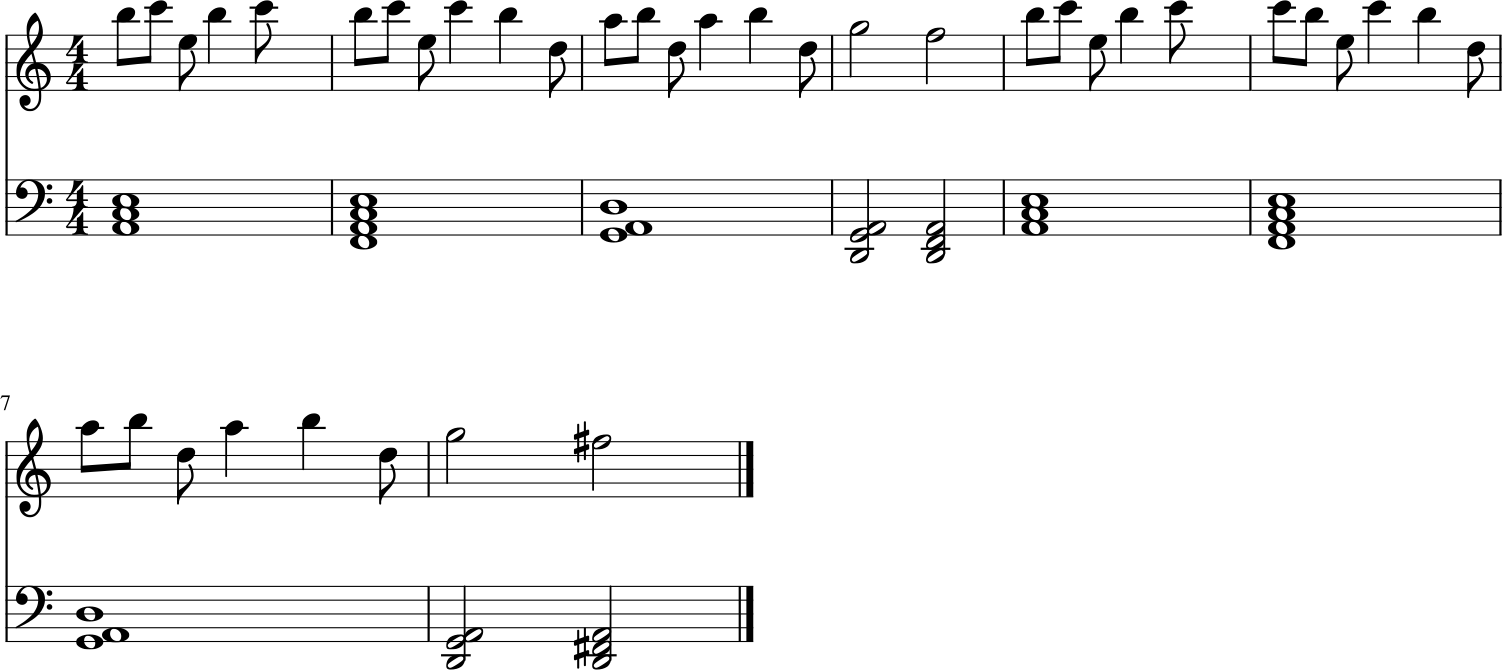

In [18]:
dec_stream.show()

In [19]:
dec_stream.show('midi')

### Encode all songs

In [20]:
from fastai.data_block import get_files

In [21]:
out_path = version_path/'midi_encode/np/hook_cont/'
out_dir = out_path/'hooktheory'
h_path = orig_path/'hooktheory/xml'

In [22]:
files = get_files(h_path, extensions=['.xml'], recurse=True); files[:10]

[PosixPath('data/midi/v7/midi_sources/hooktheory/xml/w/wayne-sharpe/yu-gi-oh-theme-song/chorus.xml'),
 PosixPath('data/midi/v7/midi_sources/hooktheory/xml/w/wayne-sharpe/yu-gi-oh-theme-song/intro.xml'),
 PosixPath('data/midi/v7/midi_sources/hooktheory/xml/w/what-a-day/kiefer/chorus.xml'),
 PosixPath('data/midi/v7/midi_sources/hooktheory/xml/w/whiteflame/senbonzakura/pre-chorus.xml'),
 PosixPath('data/midi/v7/midi_sources/hooktheory/xml/w/whiteflame/senbonzakura/verse.xml'),
 PosixPath('data/midi/v7/midi_sources/hooktheory/xml/w/whiteflame/senbonzakura/chorus.xml'),
 PosixPath('data/midi/v7/midi_sources/hooktheory/xml/w/wham/last-christmas/verse.xml'),
 PosixPath('data/midi/v7/midi_sources/hooktheory/xml/w/wham/last-christmas/chorus.xml'),
 PosixPath('data/midi/v7/midi_sources/hooktheory/xml/w/wham/last-christmas/intro.xml'),
 PosixPath('data/midi/v7/midi_sources/hooktheory/xml/w/wham/freedom/chorus.xml')]

In [23]:
metadata

{'title': 'Let It Go',
 'beats_in_measure': '4',
 'BPM': '137',
 'key': 'F',
 'YouTubeID': 'moSFlvxnbgk',
 'mode': '6',
 'duration': '16.81'}

In [24]:

def process_file(file):
    out_file = file.relative_to(h_path).with_suffix('.npy')
    out_path = out_dir/out_file
    if out_path.exists(): return out_file, out_file
    song = parse_file(file)
    if song is None or int(song.metadata.beats_in_measure) != 4: return out_file, None
    out_path.parent.mkdir(parents=True, exist_ok=True)
    npenc = enc_song(song)
    np.save(out_path, npenc)
    return out_file, out_file
    

In [25]:
process_file(file_path)

(PosixPath('i/idina-menzel/let-it-go/intro.npy'),
 PosixPath('i/idina-menzel/let-it-go/intro.npy'))

In [26]:
from data_sources import process_parallel

In [27]:
# negative octave
file_path = Path('data/midi/v7/midi_sources/hooktheory/xml/w/wayne-sharpe/yu-gi-oh-theme-song/chorus.xml')

In [28]:
content = load_data(file_path)
root = xml_parser(content)

metadata, version = get_metadata(root)
segments, num_measures = get_lead_sheet(root, version)

In [29]:
parse_file(file_path)

Part[0]:
[Chords]:
B(abs=4.0:dur=4.0) C([[sd=3:oct=3, sd=5:oct=3, sd=7:oct=3]])
B(abs=8.0:dur=2.0) C([[sd=3:oct=3, sd=5:oct=3, sd=6:oct=3, sd=1:oct=4]])
B(abs=10.0:dur=2.0) C([[sd=3:oct=3, sd=5:oct=3, sd=7:oct=3]])
B(abs=12.0:dur=6.0) C([[sd=5:oct=3, sd=6#:oct=3, sd=2:oct=4]])
B(abs=18.0:dur=1.0) C([[sd=5:oct=3, sd=6:oct=3, sd=1:oct=4, sd=3:oct=4]])
B(abs=19.0:dur=1.0) C([[sd=6:oct=3, sd=7:oct=3, sd=2:oct=4, sd=4#:oct=4]])
B(abs=20.0:dur=4.0) C([[sd=1:oct=3, sd=2#:oct=3, sd=5:oct=3]])
B(abs=24.0:dur=2.0) C([[sd=4:oct=3, sd=5#:oct=3, sd=1:oct=4, sd=2:oct=4]])
B(abs=26.0:dur=2.0) C([[sd=1:oct=3, sd=2#:oct=3, sd=5:oct=3]])
B(abs=28.0:dur=4.0) C([[sd=2#:oct=3, sd=4#:oct=3, sd=6#:oct=3]])

[Notes]:
B(abs=0.25:dur=0.25) P(sd=5:oct=4)
B(abs=0.5:dur=0.25) P(sd=4#:oct=4)
B(abs=0.75:dur=0.25) P(sd=6:oct=3)
B(abs=1.0:dur=0.25) P(sd=4:oct=4)
B(abs=1.25:dur=0.25) P(sd=3:oct=4)
B(abs=1.5:dur=0.25) P(sd=6:oct=3)
B(abs=1.75:dur=0.25) P(sd=4:oct=4)
B(abs=2.0:dur=0.25) P(sd=3:oct=4)
B(abs=2.25:dur=0.75)

In [30]:
# subset = files
# for f in subset:
#     process_file(f)

In [31]:
subset = files
encoded_files = process_parallel(process_file, subset, total=len(subset))

#5
#5
XML parse exception: 'NoneType' object has no attribute 'text'
XML parse exception: Unicode strings with encoding declaration are not supported. Please use bytes input or XML fragments without declaration.
XML parse exception: Unicode strings with encoding declaration are not supported. Please use bytes input or XML fragments without declaration.
XML parse exception: Unicode strings with encoding declaration are not supported. Please use bytes input or XML fragments without declaration.
XML parse exception: Unicode strings with encoding declaration are not supported. Please use bytes input or XML fragments without declaration.
#5
#5
#5
#5
#5
#5
XML parse exception: Unicode strings with encoding declaration are not supported. Please use bytes input or XML fragments without declaration.
XML parse exception: Unicode strings with encoding declaration are not supported. Please use bytes input or XML fragments without declaration.
XML parse exception: Unicode strings with encoding decl

### Databunch

In [32]:
from fastai_data import *
from fastai.text import *

In [33]:
np_files = get_files(out_dir, extensions=['.npy'], recurse=True); np_files[:10]

[PosixPath('data/midi/v7/midi_encode/np/hook_cont/hooktheory/w/wayne-sharpe/yu-gi-oh-theme-song/chorus.npy'),
 PosixPath('data/midi/v7/midi_encode/np/hook_cont/hooktheory/w/what-a-day/kiefer/chorus.npy'),
 PosixPath('data/midi/v7/midi_encode/np/hook_cont/hooktheory/w/whiteflame/senbonzakura/chorus.npy'),
 PosixPath('data/midi/v7/midi_encode/np/hook_cont/hooktheory/w/whiteflame/senbonzakura/pre-chorus.npy'),
 PosixPath('data/midi/v7/midi_encode/np/hook_cont/hooktheory/w/whiteflame/senbonzakura/verse.npy'),
 PosixPath('data/midi/v7/midi_encode/np/hook_cont/hooktheory/w/wham/last-christmas/chorus.npy'),
 PosixPath('data/midi/v7/midi_encode/np/hook_cont/hooktheory/w/wham/last-christmas/intro.npy'),
 PosixPath('data/midi/v7/midi_encode/np/hook_cont/hooktheory/w/wham/last-christmas/verse.npy'),
 PosixPath('data/midi/v7/midi_encode/np/hook_cont/hooktheory/w/wham/freedom/chorus.npy'),
 PosixPath('data/midi/v7/midi_encode/np/hook_cont/hooktheory/w/we-lost-the-sea/bogatyri/intro.npy')]

In [34]:
out_path

PosixPath('data/midi/v7/midi_encode/np/hook_cont')

In [35]:
def create_databunch(files, cache_name, batch_size=32, load_cached=False):
    if load_cached and (out_path/f'{cache_name}/train_ids.npy').exists():
        data = LMNPDataBunch.load(out_path, bs=batch_size, cache_name=cache_name)
    else:
        ps = [OpenNPFileProcessor()]

        data = (ItemList(items=files, path=out_path, processor=ps)
                .random_split_by_pct(0.01, seed=6)
                .label_const(label_cls=LMLabelList))
        data.x._bunch = LMNPDataBunch
        data = data.databunch(bs=batch_size)
        data.save(cache_name)
    return data

In [36]:
all_data = create_databunch(np_files, cache_name='tmp/all', load_cached=True)

In [37]:
all_data = create_databunch(np_files[:100], cache_name='tmp/sample', load_cached=True)

In [38]:
all_data

LMNPDataBunch;

Train: LabelList (99 items)
x: ItemList
[[ 2  0  0  2  0  0  0  0  0  0]
 [ 1  0  0  1  0  0  0  0  3  3]
 [10  7  3  1  0  0  0  0  3  3]
 [ 9  7  3  1  0  0  0  0  3  3]
 [12  6  3  1  0  0  0  0  3  3]
 [ 8  7  3  1  0  0  0  0  4  3]
 [ 7  7  3  1  0  0  0  0  4  3]
 [12  6  3  1  0  0  0  0  4  3]
 [ 8  7  3  1  0  0  0  0  4  3]
 [ 7  7  3  1  0  0  0  0  5  3]
 ...
 [ 1  0  0  6  9 13  0  4  4 10]
 [ 1  0  0  6  9 13  0  4  4 10]
 [ 1  0  0  6  9 13  0  4  5 10]
 [ 1  0  0  6  9 13  0  4  5 10]
 [ 1  0  0  6  9 13  0  4  5 10]
 [ 1  0  0  6  9 13  0  4  5 10]
 [ 1  0  0  6  9 13  0  4  6 10]
 [ 1  0  0  6  9 13  0  4  6 10]
 [ 1  0  0  6  9 13  0  4  6 10]
 [ 1  0  0  6  9 13  0  4  6 10]],[[ 2  0  0  2  0  0  0  0  0  0]
 [10  9  3 10 14  5  8  3  3  3]
 [ 7  9  3 10 14  5  8  4  3  3]
 [ 3  9  3 10 14  5  8  4  3  3]
 [ 3  9  4 10 14  5  8  4  3  3]
 [ 5  9  3 10 14  5  8  4  4  3]
 [ 5  9  4 10 14  5  8  4  4  3]
 [ 1  0  0 12 14  7 10  3  4  3]
 [ 5  9  3 12 

In [39]:
train_ids_file = out_path/'tmp/all/train_ids.npy'
all_ids = np.load(train_ids_file)
id_cat = np.concatenate(all_ids); id_cat.shape
max_vocab = id_cat.max(axis=0)
max_vocab = (max_vocab+1).tolist(); max_vocab

[15, 13, 5, 15, 15, 15, 15, 5, 7, 12]

In [40]:
min_vocab = id_cat.min(axis=0); min_vocab

array([1, 0, 0, 1, 0, 0, 0, 0, 0, 0])

In [41]:
ob = next(iter(all_data.train_dl))

In [42]:
ob[0].shape

torch.Size([32, 70, 10])

In [43]:
ob[0][0][:16], ob[1][0][:16]

(tensor([[ 1,  0,  0, 10, 12,  3,  7,  3,  5,  7],
         [ 1,  0,  0, 10, 12,  3,  7,  4,  5,  7],
         [ 1,  0,  0, 10, 12,  3,  7,  4,  5,  7],
         [ 1,  0,  0, 10, 12,  3,  7,  4,  5,  7],
         [ 1,  0,  0, 12, 14,  5,  9,  3,  6,  7],
         [ 1,  0,  0, 12, 14,  5,  9,  4,  6,  7],
         [ 1,  0,  0, 12, 14,  5,  9,  4,  6,  7],
         [ 1,  0,  0, 12, 14,  5,  9,  4,  6,  7],
         [ 1,  0,  0,  3,  6, 10,  0,  3,  3,  8],
         [ 1,  0,  0,  3,  6, 10,  0,  4,  3,  8],
         [ 1,  0,  0,  3,  6, 10,  0,  4,  3,  8],
         [ 1,  0,  0,  3,  6, 10,  0,  4,  3,  8],
         [ 1,  0,  0,  3,  6, 10,  0,  4,  4,  8],
         [ 1,  0,  0,  3,  6, 10,  0,  4,  4,  8],
         [ 1,  0,  0,  3,  6, 10,  0,  4,  4,  8],
         [ 1,  0,  0,  3,  6, 10,  0,  4,  4,  8]], device='cuda:0'),
 tensor([[ 1,  0,  0, 12, 14,  5,  9,  3,  6,  7],
         [ 1,  0,  0, 12, 14,  5,  9,  4,  6,  7],
         [ 1,  0,  0, 12, 14,  5,  9,  4,  6,  7],
         [ 1